In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# %matplotlib inline

In [2]:
beer = pd.read_csv("../data/5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


In [3]:
lm_model = smf.ols(formula = "beer ~ temperature", data=beer).fit()

In [4]:
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           1.11e-05
Time:                        15:19:13   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      

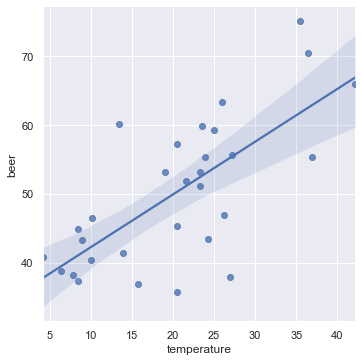

In [5]:
# TODO confidnence interval shape
sns.lmplot(x="temperature", y="beer", data=beer)
plt.show()

references: 

[1] 파이썬으로 배우는 통계학 교과서; 바바 신야 지음, 윤옹식 옮김; 한빛미디어 (2020)

# standard errors, standard deviation, confidence interval

In [6]:
print(lm_model.params)
print()
print(lm_model.conf_int())
print()
print("standard errors")
print(lm_model.bse)
print()
print("standard deviation")
print(lm_model.bse * np.sqrt(len(beer['beer'])))

Intercept      34.610215
temperature     0.765428
dtype: float64

                     0          1
Intercept    27.983920  41.236510
temperature   0.471458   1.059397

standard errors
Intercept      3.234852
temperature    0.143511
dtype: float64

standard deviation
Intercept      17.718016
temperature     0.786044
dtype: float64


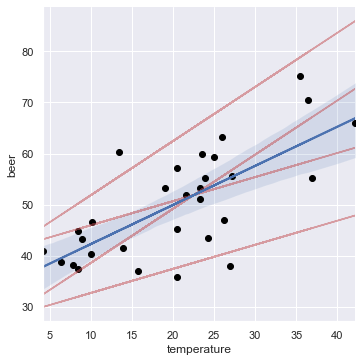

In [7]:
sns.lmplot(x="temperature", y="beer", data=beer, scatter=False)
plt.scatter(beer['temperature'], beer['beer'], label='Observed', marker='o', color='black')

a_ci0 = lm_model.conf_int()[0]['temperature']
b_ci0 = lm_model.conf_int()[0]['Intercept']

a_ci1 = lm_model.conf_int()[1]['temperature']
b_ci1 = lm_model.conf_int()[1]['Intercept']

a_ci_list = [a_ci0, a_ci1]
b_ci_list = [b_ci0, b_ci1]
for a_ci in a_ci_list:
    for b_ci in b_ci_list:
        lm_predict = b_ci + a_ci * beer['temperature'] 
        plt.plot(beer['temperature'], lm_predict, 'r', alpha=0.5)

a = lm_model.params['temperature']
b = lm_model.params['Intercept']
lm_predict = b + a * beer['temperature'] 
plt.plot(beer['temperature'], lm_predict, 'b')

plt.show()

references: 

[1] https://stats.stackexchange.com/questions/85560/shape-of-confidence-interval-for-predicted-values-in-linear-regression

[2] https://people.duke.edu/~rnau/mathreg.htm

# Confidence Interval and Prediction Interval - Part 1

In [8]:
x = beer['temperature']
y_err_ci = x.std() * np.sqrt(1 / len(x) + (x - x.mean()) ** 2 / np.sum((x - x.mean()) ** 2))
y_err_pi = x.std() * np.sqrt(1 + 1 / len(x) + (x - x.mean()) ** 2 / np.sum((x - x.mean()) ** 2))

print(f"type(beer['beer'])       : {type(beer['beer'])}")
print(f"type(beer['temperature']): {type(beer['temperature'])}")
print(f"type(lm_predict)         : {type(lm_predict)}")
print(f"type(y_err_ci)           : {type(y_err_ci)}")
print(f"type(y_err_pi)           : {type(y_err_pi)}")

type(beer['beer'])       : <class 'pandas.core.series.Series'>
type(beer['temperature']): <class 'pandas.core.series.Series'>
type(lm_predict)         : <class 'pandas.core.series.Series'>
type(y_err_ci)           : <class 'pandas.core.series.Series'>
type(y_err_pi)           : <class 'pandas.core.series.Series'>


In [9]:
data = {'temperature': beer['temperature'],
        'beer': beer['beer'],
        'lm_predict': lm_predict,
        'y_err_ci': y_err_ci,
        'y_err_pi': y_err_pi}

lm_beer = pd.DataFrame(data)
print(lm_beer.head())

   temperature  beer  lm_predict  y_err_ci   y_err_pi
0         20.5  45.3   50.301481  1.800246  10.022183
1         25.0  59.3   53.745905  1.996425  10.059274
2         10.0  40.4   42.264491  2.633247  10.204767
3         26.9  38.0   55.200217  2.172442  10.095681
4         15.8  37.0   46.703971  1.988464  10.057697


In [10]:
lm_beer = lm_beer.sort_values('temperature')
print(lm_beer.head())

    temperature  beer  lm_predict  y_err_ci   y_err_pi
5           4.2  40.9   37.825011  3.497712  10.461227
29          6.4  38.8   39.508952  3.154448  10.351513
23          7.9  38.2   40.657093  2.930021  10.285344
14          8.4  37.4   41.039807  2.857330  10.264873
9           8.5  44.9   41.116350  2.842932  10.260874


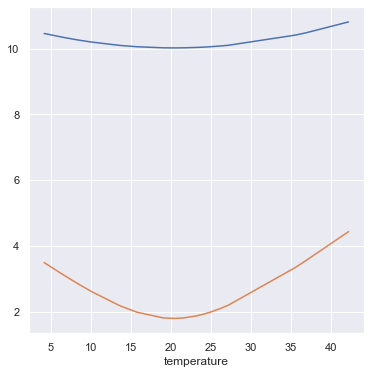

In [11]:
plt.figure(figsize=(6, 6))
plt.plot(lm_beer['temperature'], lm_beer['y_err_pi'])
plt.plot(lm_beer['temperature'], lm_beer['y_err_ci'])
plt.xlabel('temperature')
plt.show()

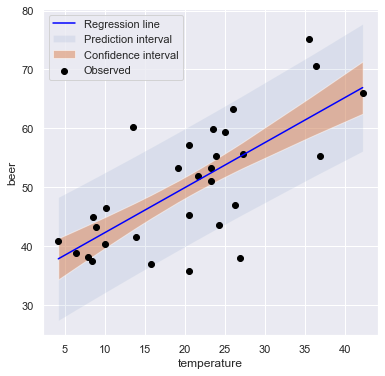

In [12]:
plt.figure(figsize=(6, 6))

plt.fill_between(lm_beer['temperature'], 
                 lm_beer['lm_predict'] - lm_beer['y_err_pi'], 
                 lm_beer['lm_predict'] + lm_beer['y_err_pi'], 
                 alpha=0.1, label='Prediction interval')

plt.fill_between(lm_beer['temperature'], 
                 lm_beer['lm_predict'] - lm_beer['y_err_ci'], 
                 lm_beer['lm_predict'] + lm_beer['y_err_ci'], 
                 alpha=0.5, label='Confidence interval')

plt.scatter(lm_beer['temperature'], lm_beer['beer'], 
            marker='o', color='black', label='Observed')

plt.plot(lm_beer['temperature'], lm_beer['lm_predict'], 
         color='blue', label='Regression line')

plt.xlabel('temperature')
plt.ylabel('beer')
plt.legend()
plt.show()

references: 

[1] https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/fill_between_demo.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-demo-py

# Confidence Interval and Prediction Interval - Part 2

1. Confidence interval of predicted values
2. Confidnece interval of the population mean
3. Prediction interval

In [13]:
alpha = 0.5
predictions = lm_model.get_prediction(beer['temperature']).summary_frame(alpha)

In [14]:
predictions['temperature'] = beer['temperature']
print(predictions.head())

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  50.301481  1.391287      49.350741      51.252221     45.008597   
1  53.745905  1.542901      52.691559      54.800251     48.433433   
2  42.264491  2.035057      40.873829      43.655153     36.875182   
3  55.200217  1.678933      54.052914      56.347521     49.868518   
4  46.703971  1.536748      45.653830      47.754112     41.392332   

   obs_ci_upper  temperature  
0     55.594364         20.5  
1     59.058377         25.0  
2     47.653800         10.0  
3     60.531917         26.9  
4     52.015610         15.8  


In [15]:
predictions = predictions.sort_values('temperature')
print(predictions.head())

         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
5   37.825011  2.703143      35.977811      39.672212     32.300261   
29  39.508952  2.437858      37.843035      41.174869     34.042144   
23  40.657093  2.264413      39.109700      42.204487     35.225230   
14  41.039807  2.208235      39.530803      42.548811     35.618755   
9   41.116350  2.197109      39.614949      42.617750     35.697409   

    obs_ci_upper  temperature  
5      43.349761          4.2  
29     44.975760          6.4  
23     46.088956          7.9  
14     46.460859          8.4  
9      46.535290          8.5  


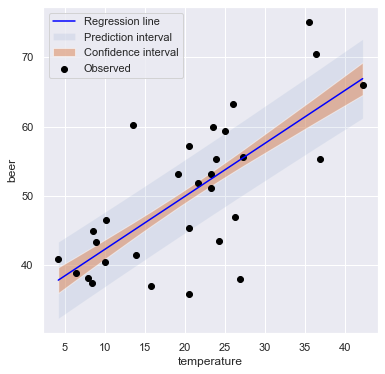

In [16]:
plt.figure(figsize=(6, 6))
plt.fill_between(predictions['temperature'], predictions['obs_ci_lower'], predictions['obs_ci_upper'], 
                 alpha=.1, label='Prediction interval')
plt.fill_between(predictions['temperature'], predictions['mean_ci_lower'], predictions['mean_ci_upper'], 
                 alpha=.5, label='Confidence interval')
plt.scatter(beer['temperature'], beer['beer'], marker='o', color='black', label='Observed')
plt.plot(predictions['temperature'], predictions['mean'], color='blue', label='Regression line')

plt.xlabel('temperature')
plt.ylabel('beer')
plt.legend()
plt.show()

references: 

[1] https://lmc2179.github.io/posts/confidence_prediction.html